 **Made By :-  Ashu Kumar**

# <center>Social Media Sentiment Analysis</center>

The goal of this project is to build a Sentiment Analysis model that analysis sentiment of social media. Here's a brief description of the columns:

+ "ID": Unique identifiers for each data point.
+ "Product": Information about the product or service mentioned in social media posts.
+ "Sentiment": Indicates the sentiment or attitude expressed in the posts (e.g., positive, negative, neutral).
+ "Text": The actual content of the social media posts, which is analyzed for insights and trends in your social media marketing dataset.

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

**Load the dataset into jupyter notebook**

In [2]:
df = pd.read_csv('twitter.csv')

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [4]:
df.shape

(74681, 4)

**Create Columns headers of each Variables**

In [5]:
df.columns = ["ID", "Product", "Sentiment", "Text"]

**Conduct an examination of the columns present in the dataset.**

In [6]:
df.columns

Index(['ID', 'Product', 'Sentiment', 'Text'], dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Product    74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


**Obtain the statistical summary of the dataset, the 'describe' function was employed.**

In [8]:
df.describe()

,ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


**Conduct an examination of the distinct values present in each column of the dataset.**

In [9]:
df.nunique()

ID           12447
Product         32
Sentiment        4
Text         69490
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [10]:
df.isnull().sum()

ID             0
Product        0
Sentiment      0
Text         686
dtype: int64

**Drop the empty rows**

In [11]:
df = df.dropna()

**Conducting an assessment to identify and examine duplicate values within the dataset.**

In [12]:
df.duplicated().sum()

2340

**Drop Duplicated data from the dataset**

In [13]:
df = df.drop_duplicates()

## Data Visualization

**Determine the frequency or count of "Product" and "Sentiment" Variables.**

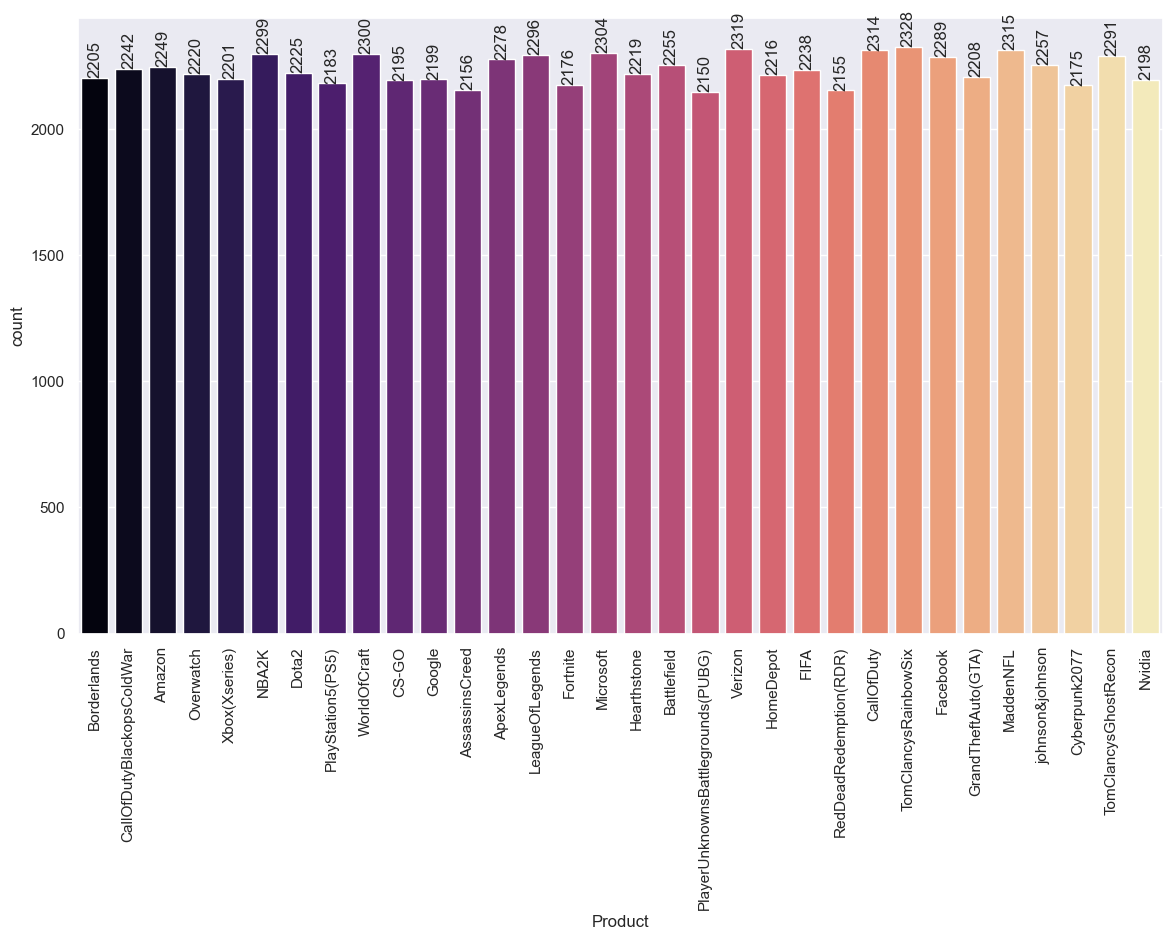

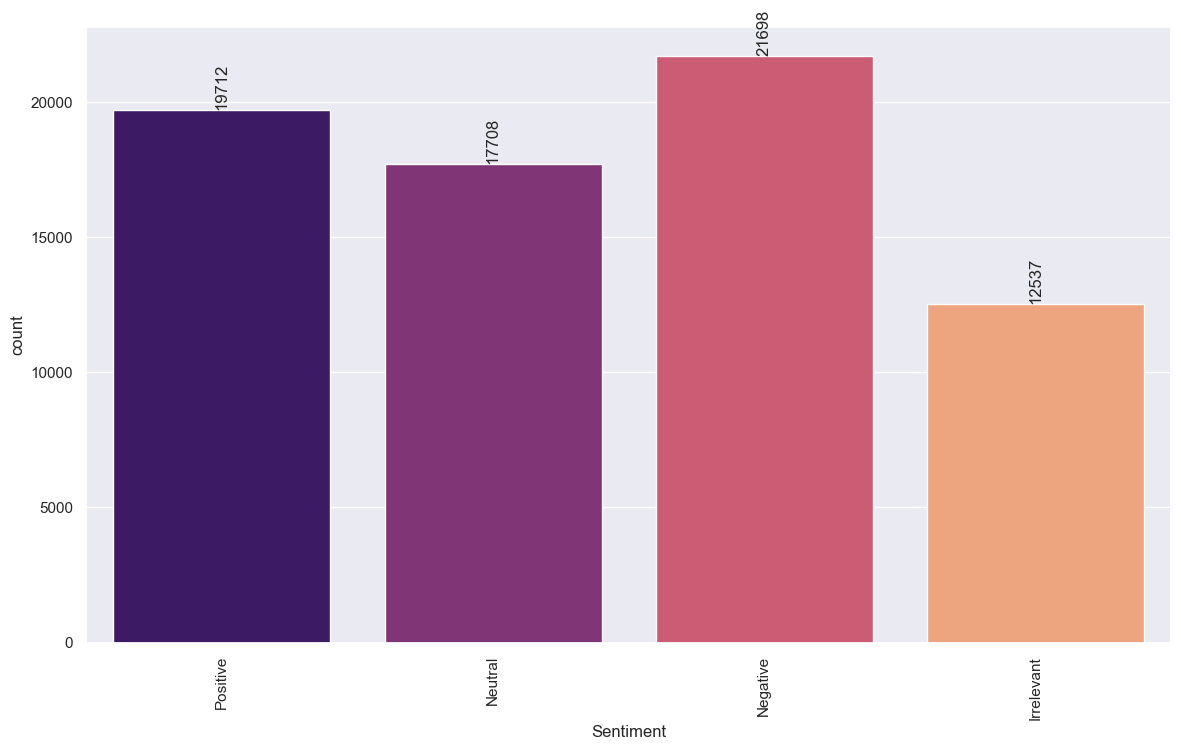

In [14]:
cat_var = ['Product','Sentiment']
for var in cat_var:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(x=var,data=df,palette='magma')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.bar_label(ax.containers[0], rotation=90)
    plt.show()

**Convert categorical 'Sentiment' Variable into numerical Variable.**

In [15]:
le_model = LabelEncoder()
df['Sentiment'] = le_model.fit_transform(df['Sentiment'])

**Assigning the features as X and target as y and then split the dataset for further modelling**

In [16]:
X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train a Naive Bayes classifier**

In [17]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))         
])
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

**Predict sentiment labels on the test data**

In [18]:
y_pred = clf.predict(X_test)

**Evaluate the model's performance**

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7219314772172214


**Print a classification report for more detailed metrics**

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.40      0.56      2455
           1       0.65      0.91      0.76      4433
           2       0.85      0.61      0.71      3532
           3       0.69      0.81      0.75      3911

    accuracy                           0.72     14331
   macro avg       0.79      0.68      0.70     14331
weighted avg       0.76      0.72      0.71     14331

